In [1]:
import pandas as pd
base = pd.read_csv("./marketing_investimento.csv")
base

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [2]:
import plotly.express as px
px.histogram(base, color="aderencia_investimento", text_auto=True, x="estado_civil", barmode="group")

In [3]:
px.box(base, x="saldo", color="aderencia_investimento")

In [26]:
x = base.drop("aderencia_investimento", axis=1)
y = base["aderencia_investimento"]

In [27]:
y.head()

0    sim
1    sim
2    nao
3    sim
4    sim
Name: aderencia_investimento, dtype: object

In [28]:
y = y.map({
    'nao': 0,
    'sim': 1
})

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le.fit(['nao', 'sim'])
# y = le.transform(y)
# y

array([1, 1, 0, ..., 1, 1, 1], shape=(1268,))

In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [32]:
columns = x.columns
one_hot = make_column_transformer((
    OneHotEncoder(drop="if_binary"),
    ["estado_civil", "escolaridade", "fez_emprestimo", "inadimplencia"]),
    remainder= "passthrough",
    sparse_threshold=0
)

In [33]:
x = one_hot.fit_transform(x)
pd.DataFrame(x, columns=one_hot.get_feature_names_out(columns))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__fez_emprestimo_sim,onehotencoder__inadimplencia_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=5)

In [35]:
from sklearn.dummy import DummyClassifier
burro = DummyClassifier()

burro.fit(x_train, y_train)
burro.score(x_test, y_test)

0.6025236593059937

In [36]:
from sklearn.tree import DecisionTreeClassifier

arvre = DecisionTreeClassifier(random_state=5)
arvre = arvre.fit(x_train, y_train)
arvre

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [37]:
arvre.predict(x_test)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [38]:
arvre.score(x_test, y_test)

0.6593059936908517

[Text(0.5525888104013104, 0.98, 'x[10] <= 248.5\ngini = 0.478\nsamples = 951\nvalue = [575, 376]'),
 Text(0.28917127354627353, 0.94, 'x[8] <= 59.5\ngini = 0.278\nsamples = 480\nvalue = [400, 80]'),
 Text(0.4208800419737919, 0.96, 'True  '),
 Text(0.15082411957411956, 0.9, 'x[10] <= 86.5\ngini = 0.253\nsamples = 458\nvalue = [390, 68]'),
 Text(0.05241605241605242, 0.86, 'x[1] <= 0.5\ngini = 0.061\nsamples = 127\nvalue = [123, 4]'),
 Text(0.03931203931203931, 0.82, 'x[8] <= 34.5\ngini = 0.034\nsamples = 114\nvalue = [112, 2]'),
 Text(0.03276003276003276, 0.78, 'x[11] <= 3.5\ngini = 0.111\nsamples = 34\nvalue = [32, 2]'),
 Text(0.02620802620802621, 0.74, 'x[9] <= 194.0\ngini = 0.18\nsamples = 20\nvalue = [18, 2]'),
 Text(0.019656019656019656, 0.7, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.03276003276003276, 0.7, 'x[9] <= 216.5\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.02620802620802621, 0.66, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03931203931203931, 0.

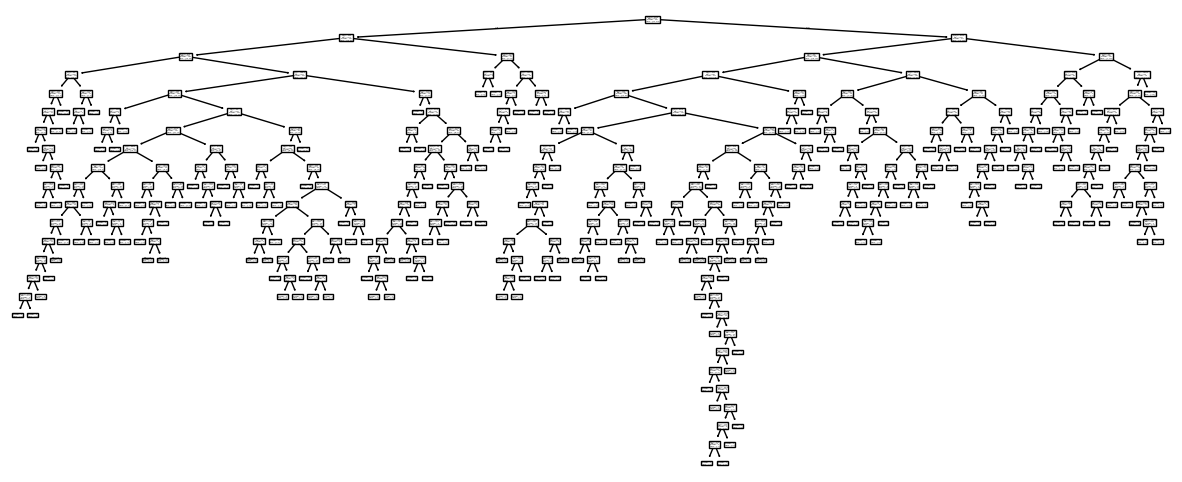

In [39]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize= (15,6))
plot_tree(arvre)

In [40]:
arvre = DecisionTreeClassifier(random_state=5, max_depth=3)
arvre = arvre.fit(x_train, y_train)

arvre

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [42]:
arvre.score(x_train, y_train)

0.7613038906414301

[Text(0.5, 0.875, 'x[10] <= 248.5\ngini = 0.478\nsamples = 951\nvalue = [575, 376]'),
 Text(0.25, 0.625, 'x[8] <= 59.5\ngini = 0.278\nsamples = 480\nvalue = [400, 80]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 86.5\ngini = 0.253\nsamples = 458\nvalue = [390, 68]'),
 Text(0.0625, 0.125, 'gini = 0.061\nsamples = 127\nvalue = [123, 4]'),
 Text(0.1875, 0.125, 'gini = 0.312\nsamples = 331\nvalue = [267, 64]'),
 Text(0.375, 0.375, 'x[10] <= 142.0\ngini = 0.496\nsamples = 22\nvalue = [10, 12]'),
 Text(0.3125, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.4375, 0.125, 'gini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(0.75, 0.625, 'x[10] <= 628.5\ngini = 0.467\nsamples = 471\nvalue = [175, 296]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[5] <= 0.5\ngini = 0.499\nsamples = 312\nvalue = [148, 164]'),
 Text(0.5625, 0.125, 'gini = 0.495\nsamples = 212\nvalue = [117.0, 95.0]'),
 Text(0.6875, 0.125, 'gini = 0.428\nsamples = 100\nvalue = [31, 69]'),
 

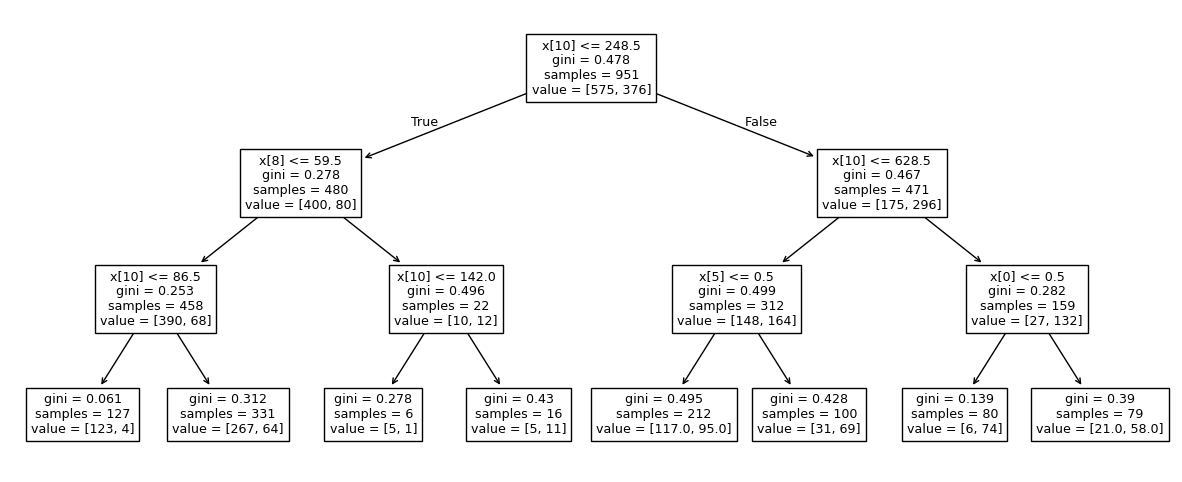

In [43]:
plt.figure(figsize= (15,6))
plot_tree(arvre)

In [44]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
x_norm = norm.fit_transform(x_train)

x_norm_dataset = pd.DataFrame(x_norm)
x_norm_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032


In [51]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(x_norm, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [52]:
x_norm_test = norm.transform(x_test)

In [53]:
neigh.score(x_norm_test, y_test)

0.7034700315457413